In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import skew
from scipy.stats import mode
import plotly.express as px
import warnings
warnings.filterwarnings("ignore")

pd.set_option('display.max_columns', None)  # Show all columns
pd.set_option('display.width', None)  # Adjust width to avoid line wrapping
pd.set_option('display.max_colwidth', None)  # Display full content in each cell

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
# File path
file_path = "/content/drive/MyDrive/Research/Heart-Failure/Data/Filtered_Data.csv"
file_path_md = "/content/drive/MyDrive/Research/Heart-Failure/Data/dat_md.csv"
# Load CSV into DataFrame
filtered_data = pd.read_csv(file_path)
meds = pd.read_csv(file_path_md)

In [5]:
filtered_data.head()

,Unnamed: 0,inpatient.number,DestinationDischarge,admission.ward,admission.way,discharge.department,visit.times,gender,body.temperature,pulse,respiration,systolic.blood.pressure,diastolic.blood.pressure,map,weight,height,BMI,type.of.heart.failure,NYHA.cardiac.function.classification,Killip.grade,myocardial.infarction,congestive.heart.failure,peripheral.vascular.disease,cerebrovascular.disease,dementia,Chronic.obstructive.pulmonary.disease,connective.tissue.disease,diabetes,hemiplegia,leukemia,malignant.lymphoma,solid.tumor,AIDS,type.II.respiratory.failure,consciousness,eye.opening,verbal.response,movement,oxygen.inhalation,fio2,acute.renal.failure,outcome.during.hospitalization,death.within.28.days,re.admission.within.28.days,death.within.3.months,re.admission.within.3.months,death.within.6.months,re.admission.within.6.months,GCS,dischargeDay,ageCat,mean.corpuscular.volume,hemoglobin,mean.hemoglobin.volume,hematocrit,occupation,neutrophil.count,neutrophil.ratio,platelet,eosinophil.count,eosinophil.ratio,basophil.count,basophil.ratio,mean.hemoglobin.concentration,lymphocyte.count,red.blood.cell,monocyte.count,monocyte.ratio,white.blood.cell,uric.acid,urea,creatinine.enzymatic.method,carbon.dioxide.binding.capacity,chloride,potassium,calcium,sodium,CCI.score,moderate.to.severe.chronic.kidney.disease,peptic.ulcer.disease,liver.disease,return.to.emergency.department.within.6.months
0,1,857781,Home,Cardiology,NonEmergency,Cardiology,1,Male,36.7,87,19,102,64,76.666667,50.0,1.64,18.590125,Both,III,III,0,0,0,0,0,1,0,1,0,0,0,0,0,NonTypeII,Clear,4,5,6,OxygenTherapy,33,0,Alive,0,0,0,0,0,0,15,11,"(69,79]",94.5,131.0,32.0,0.387,UrbanResident,7.05,0.746,102.0,0.02,0.002,0.05,0.006,338.0,1.51,4.09,0.80,0.085,9.43,685.0,12.55,108.3,21.6,101.9,5.59,2.28,134.6,2.0,0.0,0.0,0.0,0.0
1,2,743087,Home,Cardiology,NonEmergency,Cardiology,1,Female,36.8,95,18,150,70,96.666667,51.0,1.63,19.195303,Both,III,I,0,0,0,0,0,0,0,0,0,0,0,0,0,NonTypeII,Clear,4,5,6,OxygenTherapy,33,0,Alive,0,0,0,0,0,0,15,8,"(69,79]",88.6,114.0,28.9,0.349,UrbanResident,3.73,0.702,123.0,0.05,0.009,0.01,0.002,326.0,1.18,3.93,0.35,0.066,5.32,170.0,4.29,62.0,26.5,105.6,3.62,2.28,144.0,0.0,0.0,0.0,0.0,0.0
2,3,866418,Home,Cardiology,NonEmergency,Cardiology,2,Male,36.5,98,18,102,67,78.666667,70.0,1.70,24.221453,Both,II,II,0,0,0,0,0,0,0,0,0,0,0,0,0,NonTypeII,Clear,4,5,6,OxygenTherapy,33,0,Alive,0,0,0,0,0,0,15,5,"(59,69]",96.4,144.0,32.6,0.427,farmer,11.54,0.887,169.0,0.02,0.002,0.03,0.002,339.0,0.75,4.43,0.67,0.051,13.01,567.0,15.99,185.1,21.6,107.0,4.15,2.56,142.2,0.0,0.0,0.0,0.0,0.0
3,4,775928,Home,Cardiology,Emergency,Cardiology,1,Male,36.0,73,19,110,74,86.000000,65.0,1.70,22.491349,Both,III,II,0,0,0,0,0,1,0,0,0,0,0,0,0,NonTypeII,Clear,4,5,6,OxygenTherapy,33,0,Alive,0,1,0,1,0,1,15,11,"(69,79]",102.2,94.0,34.7,0.277,UrbanResident,1.22,0.559,35.0,0.06,0.028,0.00,0.000,339.0,0.71,2.71,0.19,0.087,2.18,635.0,8.16,104.8,21.1,101.6,3.76,2.35,136.3,2.0,1.0,0.0,0.0,1.0
4,5,810128,Home,Cardiology,NonEmergency,Cardiology,1,Female,35.0,88,19,134,62,86.000000,76.0,1.55,31.633715,Both,III,II,0,0,0,0,0,0,0,0,0,0,0,0,0,NonTypeII,Clear,4,5,6,OxygenTherapy,33,0,Alive,0,0,0,0,0,0,15,5,"(69,79]",90.0,120.0,28.6,0.378,UrbanResident,4.28,0.697,104.0,0.05,0.008,0.01,0.002,317.0,1.27,4.20,0.53,0.086,6.14,432.0,6.86,83.9,22.8,104.3,3.94,2.42,136.6,0.0,0.0,0.0,0.0,0.0


In [6]:
meds.head()

,Unnamed: 0,inpatient.number,Drug_name
0,1,857781,sulfotanshinone sodium injection
1,2,857781,Furosemide tablet
2,3,857781,Enoxaparin Sodium injection
3,4,857781,Meglumine Adenosine Cyclophosphate for injection
4,5,857781,Furosemide injection


# Trend Analysis

# 1. Readmission Analysis by Conditions and Medications

**What We Are Doing**

This analysis investigates the relationship between specific patient conditions (e.g., types of heart failure) and medications with 28-day readmission rates.

**We aim to:**
Understand which heart failure types are more likely to lead to patient readmissions.
Identify medications that are strongly correlated with higher readmission rates.

***How It Helps***

**For Conditions:** By analyzing the readmission rates for different heart failure types, we can pinpoint which groups of patients are at higher risk. This insight allows healthcare providers to design targeted post-discharge care plans, such as closer monitoring or follow-up appointments for those patients.

**For Medications:** Identifying medications associated with high readmission rates highlights potential inefficacies, side effects, or patient adherence issues. Hospitals can evaluate these medications further to determine whether alternative treatments or adjustments are necessary.

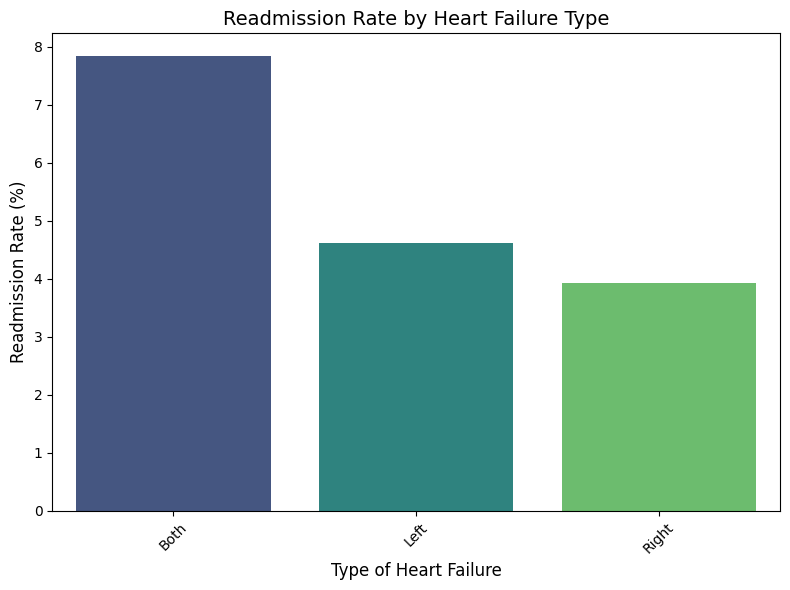

In [7]:

# Example data
readmission_analysis = filtered_data.groupby('type.of.heart.failure')['re.admission.within.28.days'].mean().reset_index()
readmission_analysis['re.admission.within.28.days'] *= 100  # Convert to percentage

# Seaborn bar plot
plt.figure(figsize=(8, 6))
sns.barplot(data=readmission_analysis, x='type.of.heart.failure', y='re.admission.within.28.days', palette='viridis')
plt.title('Readmission Rate by Heart Failure Type', fontsize=14)
plt.xlabel('Type of Heart Failure', fontsize=12)
plt.ylabel('Readmission Rate (%)', fontsize=12)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [8]:
# Plotly Scatter Plot with Percentage Readmission Rate
# Correlation of medications with readmission
medication_analysis = pd.merge(meds, filtered_data, on='inpatient.number')
med_readmission = medication_analysis.groupby('Drug_name')['re.admission.within.28.days'].mean().sort_values(ascending=False).reset_index()
med_readmission['re.admission.within.28.days'] *= 100  # Convert to percentage

# Plotly scatter plot
fig = px.scatter(
    med_readmission.head(20), x='Drug_name', y='re.admission.within.28.days',
    title='Top 20 Medications Correlated with Readmission',
    color='re.admission.within.28.days',
    labels={'Drug_name': 'Medication', 're.admission.within.28.days': 'Readmission Rate (%)'},
    color_continuous_scale='Viridis'
)
fig.update_traces(marker=dict(size=12))
fig.show()

# 2. Length of Stay (LOS) Analysis

**What We Are Doing:**

Analyzing how the Length of Stay (LOS) varies for patients based on the presence (Yes) or absence (No) of Chronic Kidney Disease and Diabetes.
Calculating the average LOS for each condition (Chronic Kidney Disease and Diabetes) and their respective statuses (Yes or No).

***How It Helps***

**Identifying High-Risk Groups:**

1. Reveals which conditions lead to longer hospital stays, helping prioritize resource allocation and patient care improvements.
Improving Treatment Strategies:

2. Highlights the impact of chronic diseases on LOS, allowing hospitals to optimize treatments for patients with these conditions.
Efficient Resource Management:

3. Provides actionable insights to manage bed availability, staffing, and operational planning for patients with chronic conditions.

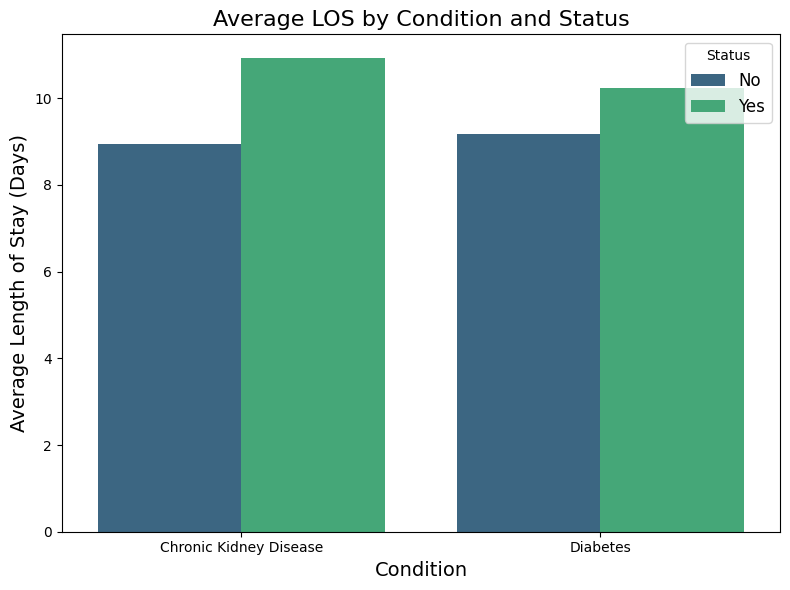

In [9]:

# Melt the data to long format for both conditions
melted_data = pd.melt(
    filtered_data,
    id_vars=['dischargeDay'],
    value_vars=['moderate.to.severe.chronic.kidney.disease', 'diabetes'],
    var_name='Condition',
    value_name='Status'
)

# Map the conditions and statuses to readable labels
melted_data['Condition'] = melted_data['Condition'].map({
    'moderate.to.severe.chronic.kidney.disease': 'Chronic Kidney Disease',
    'diabetes': 'Diabetes'
})

melted_data['Status'] = melted_data['Status'].map({1: 'Yes', 0: 'No'})

# Calculate the average Length of Stay for each condition and status
avg_los_data = melted_data.groupby(['Condition', 'Status'])['dischargeDay'].mean().reset_index()

# Create the grouped bar plot
plt.figure(figsize=(8, 6))
sns.barplot(
    data=avg_los_data,
    x='Condition',
    y='dischargeDay',
    hue='Status',
    palette='viridis'
)
plt.title('Average LOS by Condition and Status', fontsize=16)
plt.xlabel('Condition', fontsize=14)
plt.ylabel('Average Length of Stay (Days)', fontsize=14)
plt.legend(title='Status', loc='upper right', fontsize=12)
plt.tight_layout()
plt.show()

# 3. Comprehensive Analysis of Vital Signs at Admission and Patient Outcomes


**What We Are Doing**
We are conducting a comprehensive analysis of various vital signs recorded at patient admission to investigate their relationship with patient outcomes, specifically focusing on 28-day mortality rates.

**The vital signs analyzed include:**

* Systolic Blood Pressure
* Diastolic Blood Pressure
* Heart Rate (Pulse)
* Respiration Rate
* Body Temperature

**We aim to:**

1. Determine if abnormal values in any of these vital signs correlate with worse patient outcomes.
2. Identify specific thresholds or ranges in these vital signs that may indicate a higher risk of mortality.

**How It Helps:**
1. Early Risk Identification: By recognizing abnormal vital sign ranges associated with higher mortality rates, healthcare providers can promptly identify at-risk patients upon admission.
2. Enhanced Triage Protocols: The findings assist in refining triage protocols and early warning systems to prioritize patients needing immediate attention.
3. Clinical Guidelines Development: Supports the creation or updating of clinical guidelines for managing patients with abnormal vital signs.
4. Improved Patient Monitoring: Encourages closer monitoring and proactive interventions for patients exhibiting specific vital sign abnormalities.
5. Resource Allocation: Aids in efficiently allocating resources by identifying patients who may require more intensive care or monitoring.

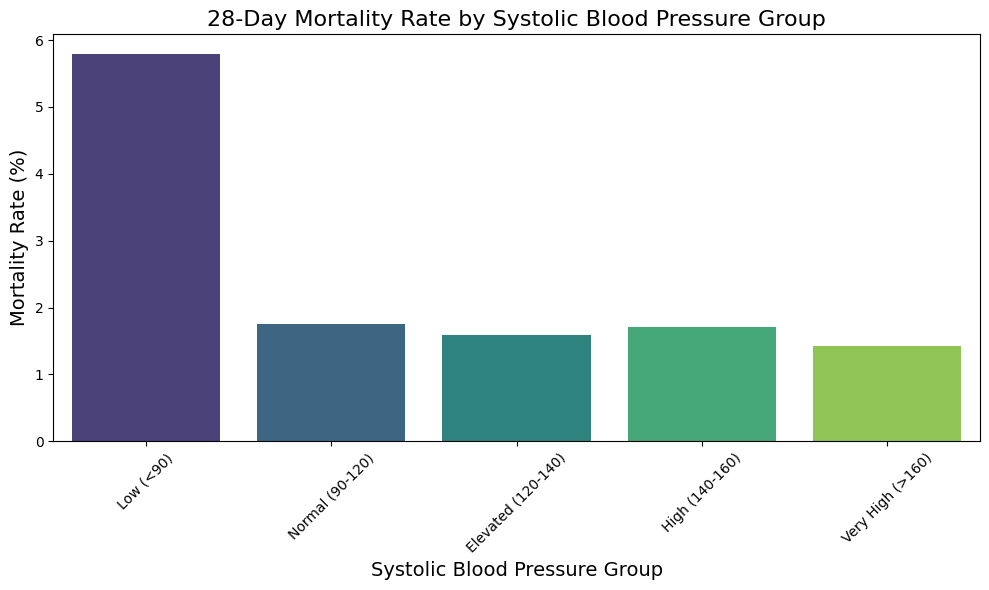

In [10]:

# Create bins for systolic blood pressure
filtered_data['SBP_Group'] = pd.cut(
    filtered_data['systolic.blood.pressure'],
    bins=[0, 90, 120, 140, 160, 300],
    labels=['Low (<90)', 'Normal (90-120)', 'Elevated (120-140)', 'High (140-160)', 'Very High (>160)']
)

# Calculate mortality rates by SBP group
sbp_mortality = filtered_data.groupby('SBP_Group')['death.within.28.days'].mean().reset_index()
sbp_mortality['death.within.28.days'] *= 100  # Convert to percentage

# Plotting
plt.figure(figsize=(10, 6))
sns.barplot(
    data=sbp_mortality,
    x='SBP_Group',
    y='death.within.28.days',
    palette='viridis'
)
plt.title('28-Day Mortality Rate by Systolic Blood Pressure Group', fontsize=16)
plt.xlabel('Systolic Blood Pressure Group', fontsize=14)
plt.ylabel('Mortality Rate (%)', fontsize=14)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


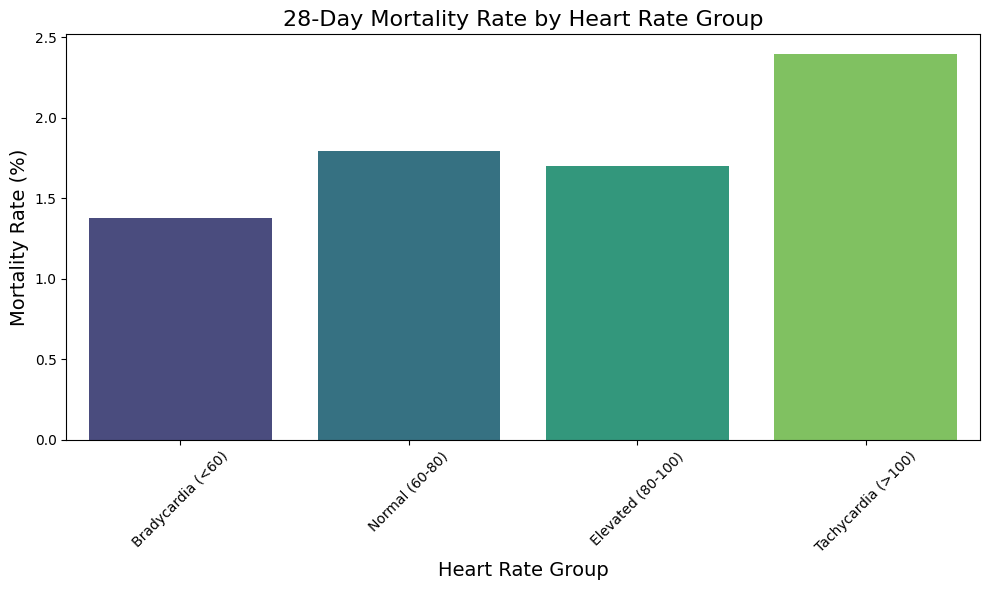

In [11]:

# Create bins for heart rate (pulse)
filtered_data['Pulse_Group'] = pd.cut(
    filtered_data['pulse'],
    bins=[0, 60, 80, 100, 200],
    labels=['Bradycardia (<60)', 'Normal (60-80)', 'Elevated (80-100)', 'Tachycardia (>100)']
)

# Calculate mortality rates by pulse group
pulse_mortality = filtered_data.groupby('Pulse_Group')['death.within.28.days'].mean().reset_index()
pulse_mortality['death.within.28.days'] *= 100  # Convert to percentage

# Plotting
plt.figure(figsize=(10, 6))
sns.barplot(
    data=pulse_mortality,
    x='Pulse_Group',
    y='death.within.28.days',
    palette='viridis'
)
plt.title('28-Day Mortality Rate by Heart Rate Group', fontsize=16)
plt.xlabel('Heart Rate Group', fontsize=14)
plt.ylabel('Mortality Rate (%)', fontsize=14)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

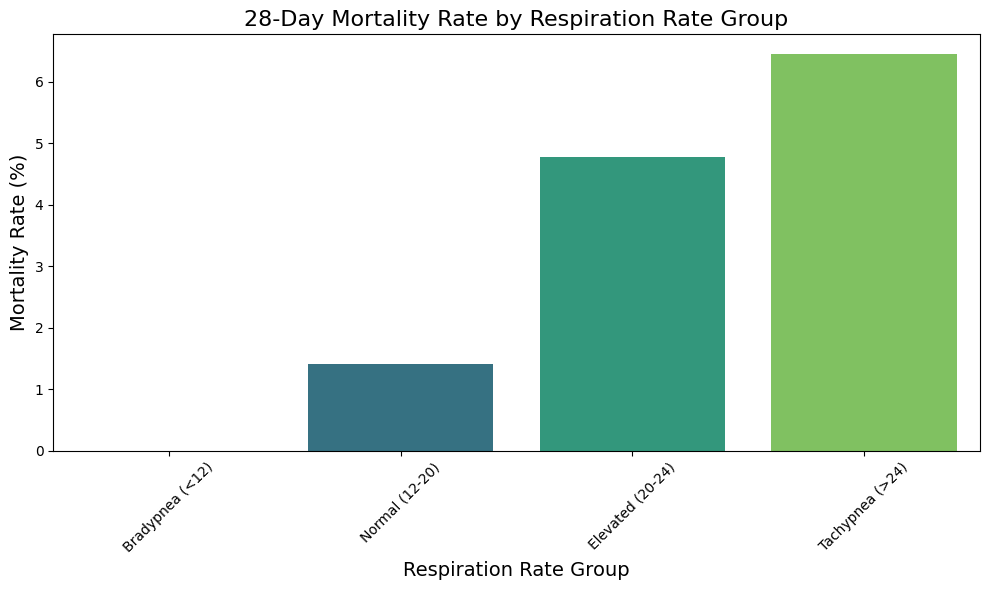

In [12]:

# Create bins for respiration rate
filtered_data['Respiration_Group'] = pd.cut(
    filtered_data['respiration'],
    bins=[0, 12, 20, 24, 60],
    labels=['Bradypnea (<12)', 'Normal (12-20)', 'Elevated (20-24)', 'Tachypnea (>24)']
)

# Calculate mortality rates by respiration group
respiration_mortality = filtered_data.groupby('Respiration_Group')['death.within.28.days'].mean().reset_index()
respiration_mortality['death.within.28.days'] *= 100  # Convert to percentage

# Plotting
plt.figure(figsize=(10, 6))
sns.barplot(
    data=respiration_mortality,
    x='Respiration_Group',
    y='death.within.28.days',
    palette='viridis'
)
plt.title('28-Day Mortality Rate by Respiration Rate Group', fontsize=16)
plt.xlabel('Respiration Rate Group', fontsize=14)
plt.ylabel('Mortality Rate (%)', fontsize=14)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

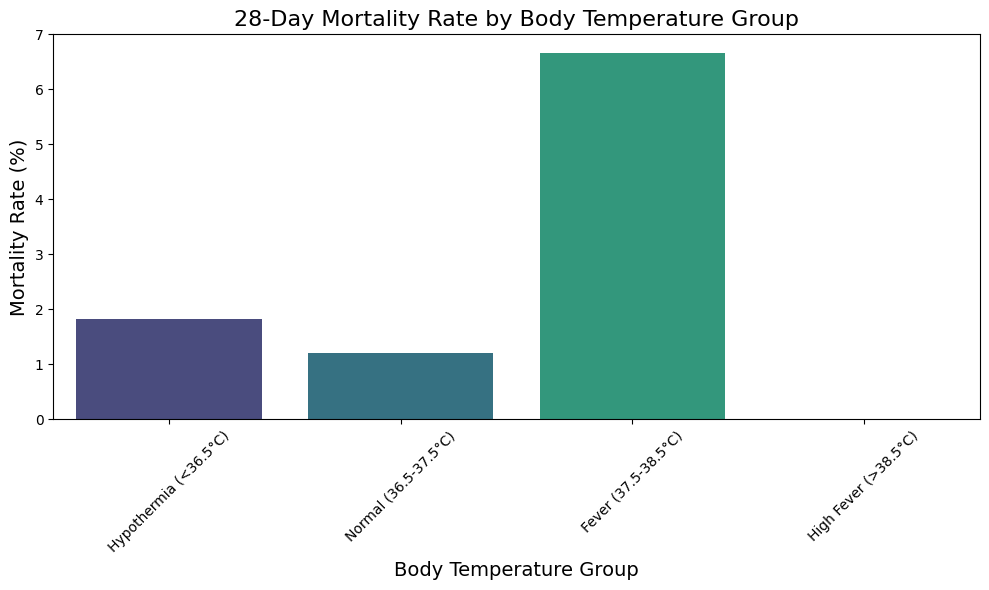

In [13]:

# Create bins for body temperature
filtered_data['Temperature_Group'] = pd.cut(
    filtered_data['body.temperature'],
    bins=[35, 36.5, 37.5, 38.5, 42],
    labels=['Hypothermia (<36.5°C)', 'Normal (36.5-37.5°C)', 'Fever (37.5-38.5°C)', 'High Fever (>38.5°C)']
)

# Calculate mortality rates by temperature group
temperature_mortality = filtered_data.groupby('Temperature_Group')['death.within.28.days'].mean().reset_index()
temperature_mortality['death.within.28.days'] *= 100  # Convert to percentage

# Plotting
plt.figure(figsize=(10, 6))
sns.barplot(
    data=temperature_mortality,
    x='Temperature_Group',
    y='death.within.28.days',
    palette='viridis'
)
plt.title('28-Day Mortality Rate by Body Temperature Group', fontsize=16)
plt.xlabel('Body Temperature Group', fontsize=14)
plt.ylabel('Mortality Rate (%)', fontsize=14)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

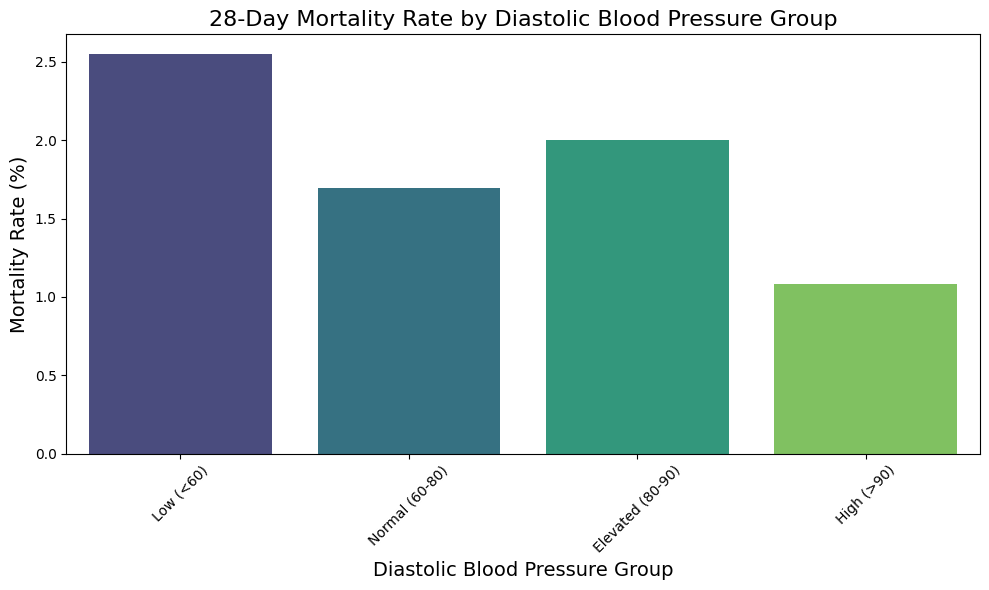

In [14]:

# Create bins for diastolic blood pressure
filtered_data['DBP_Group'] = pd.cut(
    filtered_data['diastolic.blood.pressure'],
    bins=[0, 60, 80, 90, 200],
    labels=['Low (<60)', 'Normal (60-80)', 'Elevated (80-90)', 'High (>90)']
)

# Calculate mortality rates by DBP group
dbp_mortality = filtered_data.groupby('DBP_Group')['death.within.28.days'].mean().reset_index()
dbp_mortality['death.within.28.days'] *= 100  # Convert to percentage

# Plotting
plt.figure(figsize=(10, 6))
sns.barplot(
    data=dbp_mortality,
    x='DBP_Group',
    y='death.within.28.days',
    palette='viridis'
)
plt.title('28-Day Mortality Rate by Diastolic Blood Pressure Group', fontsize=16)
plt.xlabel('Diastolic Blood Pressure Group', fontsize=14)
plt.ylabel('Mortality Rate (%)', fontsize=14)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# 4. Effect of Laboratory Values on Patient Outcomes


**What We Are Doing:**
Analyzing the impact of critical laboratory values (e.g., hemoglobin, white blood cell count, creatinine levels) on patient outcomes such as mortality and readmission rates.

**We aim to:**

1. Identify abnormal lab values that are associated with worse patient outcomes.
2. Determine threshold values that may indicate higher risk.
**How It Helps**
1. Clinical Decision-Making: Aids clinicians in recognizing high-risk patients based on lab results at admission.
2. Early Intervention: Promotes timely interventions for patients with critical lab abnormalities.
3. Monitoring Protocols: Supports the development of monitoring guidelines for patients with specific lab value deviations.

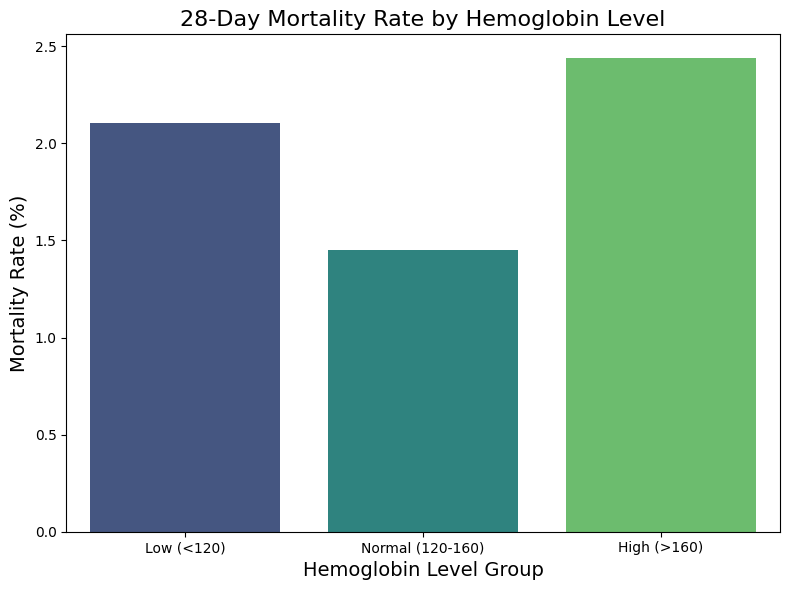

In [15]:

# Analyze Hemoglobin Levels

# Ensure 'hemoglobin' is numeric
filtered_data['hemoglobin'] = pd.to_numeric(filtered_data['hemoglobin'], errors='coerce')

# Create bins for hemoglobin levels (values in g/L)
filtered_data['Hemoglobin_Group'] = pd.cut(
    filtered_data['hemoglobin'],
    bins=[0, 120, 160, 250],
    labels=['Low (<120)', 'Normal (120-160)', 'High (>160)']
)

# Calculate mortality rates by hemoglobin group
hb_mortality = filtered_data.groupby('Hemoglobin_Group')['death.within.28.days'].mean().reset_index()
hb_mortality['death.within.28.days'] *= 100  # Convert to percentage

# Plotting
plt.figure(figsize=(8, 6))
sns.barplot(
    data=hb_mortality,
    x='Hemoglobin_Group',
    y='death.within.28.days',
    palette='viridis'
)
plt.title('28-Day Mortality Rate by Hemoglobin Level', fontsize=16)
plt.xlabel('Hemoglobin Level Group', fontsize=14)
plt.ylabel('Mortality Rate (%)', fontsize=14)
plt.tight_layout()
plt.show()


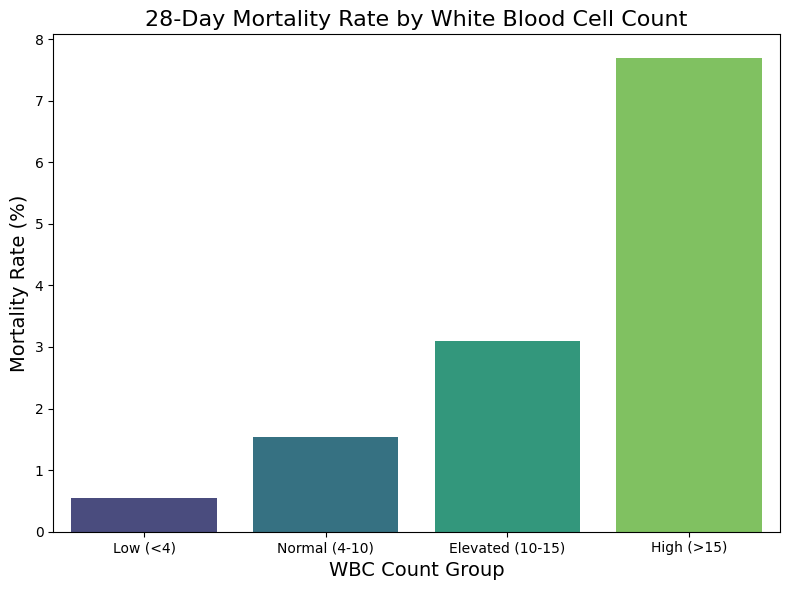

In [16]:

# Analyze White Blood Cell Count

# Ensure 'white.blood.cell' is numeric
filtered_data['white.blood.cell'] = pd.to_numeric(filtered_data['white.blood.cell'], errors='coerce')

# Create bins for WBC count (values in 10^9/L)
filtered_data['WBC_Group'] = pd.cut(
    filtered_data['white.blood.cell'],
    bins=[0, 4, 10, 15, 100],
    labels=['Low (<4)', 'Normal (4-10)', 'Elevated (10-15)', 'High (>15)']
)

# Calculate mortality rates by WBC group
wbc_mortality = filtered_data.groupby('WBC_Group')['death.within.28.days'].mean().reset_index()
wbc_mortality['death.within.28.days'] *= 100  # Convert to percentage

# Plotting
plt.figure(figsize=(8, 6))
sns.barplot(
    data=wbc_mortality,
    x='WBC_Group',
    y='death.within.28.days',
    palette='viridis'
)
plt.title('28-Day Mortality Rate by White Blood Cell Count', fontsize=16)
plt.xlabel('WBC Count Group', fontsize=14)
plt.ylabel('Mortality Rate (%)', fontsize=14)
plt.tight_layout()
plt.show()

# 5. Medication Usage Frequency Across Age Groups

**What We Are Doing:**
This analysis examines the frequency of prescribed medications across different age groups. We aim to identify which medications are most commonly used in each age category.

**We aim to:**

1. Determine the most frequently prescribed medications in different age groups.
2. Identify any age-related patterns in medication usage.
**How It Helps:**
1. Inventory Management: Helps in optimizing the hospital's medication inventory based on age-related demand.
2. Age-Specific Care Plans: Assists clinicians in understanding medication needs for different age groups, allowing for tailored treatment plans.
3. Potential Overuse Identification: Highlights medications that may be over-prescribed in certain age groups, prompting a review of prescribing practices.

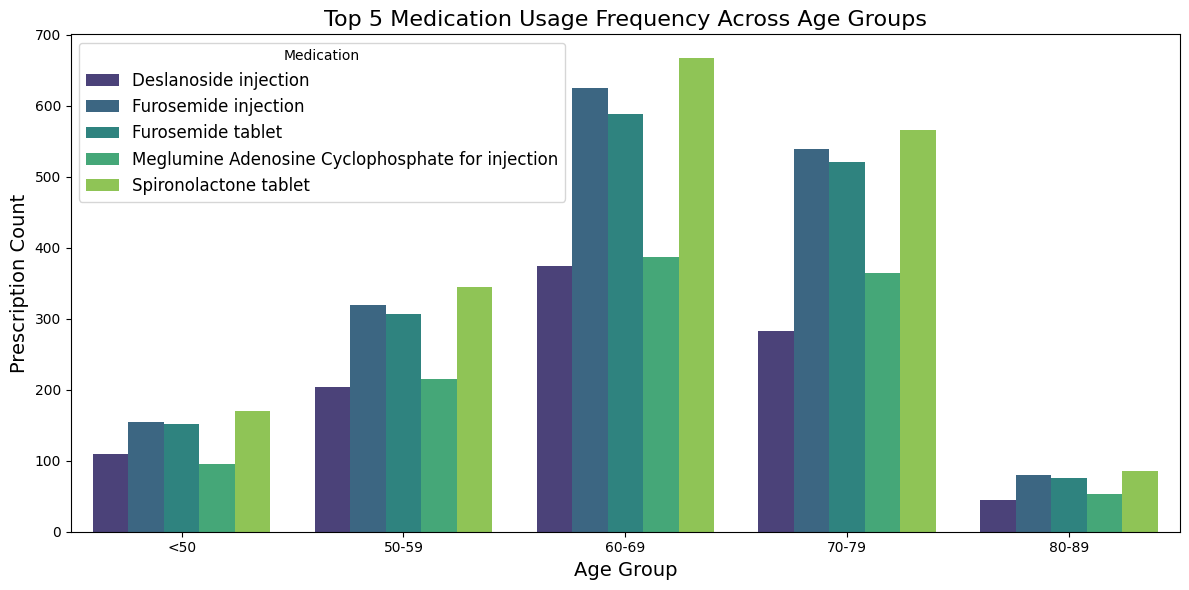

In [17]:

# Merge medication data with patient age
med_age_data = pd.merge(
    meds,
    filtered_data[['inpatient.number', 'ageCat']],
    on='inpatient.number'
)

# **Step 1: Convert 'ageCat' to string type**
med_age_data['ageCat'] = med_age_data['ageCat'].astype(str)

# **Step 2: Handle missing values**
# Remove rows where 'ageCat' is 'nan' (string representation of NaN)
med_age_data = med_age_data[med_age_data['ageCat'] != 'nan']

# **Alternative: If you prefer to fill missing values**
# med_age_data['ageCat'] = med_age_data['ageCat'].replace('nan', 'Unknown')

# Extract the lower age limit for sorting
med_age_data['Age_Lower_Limit'] = med_age_data['ageCat'].str.extract('(\d+)', expand=False).astype(int)

# Define age categories for grouping
age_bins = [0, 49, 59, 69, 79, 89]
age_labels = ['<50', '50-59', '60-69', '70-79', '80-89']

med_age_data['Age_Group'] = pd.cut(
    med_age_data['Age_Lower_Limit'],
    bins=age_bins,
    labels=age_labels,
    right=True
)

# Get top 5 medications overall
top_meds = meds['Drug_name'].value_counts().head(5).index

# Filter data for top medications
med_age_filtered = med_age_data[med_age_data['Drug_name'].isin(top_meds)]

# Calculate medication counts per age group
med_counts = med_age_filtered.groupby(['Age_Group', 'Drug_name']).size().reset_index(name='Count')

# **Sort age groups for proper order in the plot**
age_order = ['<50', '50-59', '60-69', '70-79', '80-89']
med_counts['Age_Group'] = pd.Categorical(med_counts['Age_Group'], categories=age_order, ordered=True)

# Plotting
plt.figure(figsize=(12, 6))
sns.barplot(
    data=med_counts,
    x='Age_Group',
    y='Count',
    hue='Drug_name',
    palette='viridis'
)
plt.title('Top 5 Medication Usage Frequency Across Age Groups', fontsize=16)
plt.xlabel('Age Group', fontsize=14)
plt.ylabel('Prescription Count', fontsize=14)
plt.legend(title='Medication', fontsize=12)
plt.tight_layout()
plt.show()

# 6. Mortality Rate by Department

**What We Are Doing**
* Analyzing the 28-day mortality rates for patients discharged from different hospital departments.
* Comparing mortality rates across departments to identify any significant differences.

**How It Helps**
1. Departmental Performance: Identifies departments with higher mortality rates, prompting a review of clinical practices and patient care protocols.
2. Quality Improvement: Supports initiatives to enhance patient outcomes in departments where mortality rates are higher.
3. Resource Allocation: Assists in allocating resources and training to departments that may require additional support.

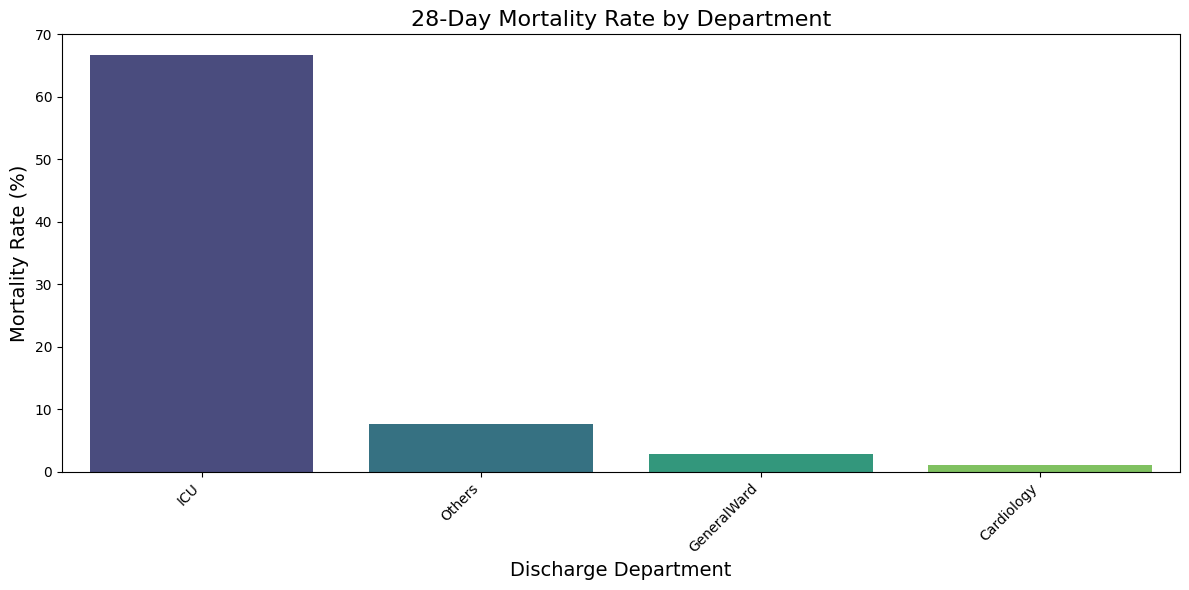

In [18]:

# Calculate mortality rates by department
mortality_by_department = filtered_data.groupby('discharge.department')['death.within.28.days'].mean().reset_index()
mortality_by_department['Mortality_Rate'] = mortality_by_department['death.within.28.days'] * 100  # Convert to percentage

# Sort departments by mortality rate
mortality_by_department = mortality_by_department.sort_values(by='Mortality_Rate', ascending=False)

# Plotting
plt.figure(figsize=(12, 6))
sns.barplot(
    data=mortality_by_department,
    x='discharge.department',
    y='Mortality_Rate',
    palette='viridis'
)
plt.title('28-Day Mortality Rate by Department', fontsize=16)
plt.xlabel('Discharge Department', fontsize=14)
plt.ylabel('Mortality Rate (%)', fontsize=14)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()